# Which game will be succeeded ?


The online store Ice, which sells video games all over the world.

User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.
We need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of us is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

We are  forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. 

The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Goal:


1.Building a forecast for 2017  and prediction  of the sales, popularity, profitability of the platforms

There are 2 hypotesis we are testing:

1.Average user ratings of the Xbox One and PC platforms are the same.

2.Average user ratings for the Action and Sports genres are different

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the data file into a DataFrame
df_games = pd.read_csv('/datasets/games.csv')

##  Explore initial data

The dataset contains the following fields:

- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

In [3]:
# print the generalinformation
df_games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# summary information about the DataFrame
df_games.info()
df_games.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(16715, 11)

In [5]:
# Checking missing values
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

What columns contain the most missing values?

In [6]:
# Percentage of missing values
missing_values=df_games.isnull().sum()
missing_values[missing_values>0]/len(df_games)*100

Name                0.011965
Year_of_Release     1.609333
Genre               0.011965
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64


- Dataset have 16715 row and 11 columns.
- All columns have different number of row. That means they have missing values
- The values in the column 'year_of_release' is float 
- Names of columns have differen register type


In [7]:
# Let's check distribution of the data
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Conclusions and further steps


1.Dataset has  of missing values.

Variable 'name' and 'genre' have the same amount of missing data.Missing data do have a relationship with other variables in the dataset. However, the actual values that are missing are random.

3.Type of missing data is MAP

4.Data in columns 'critic_score' and 'user_score' are quantitative variables and 


5.Data in colums 'name', 'genre' are qualitative and will be replaces with empty string and  column 'rating' by mode

6.All dataset have different type of register so will be transformed to lowercase register 

##  Prepare the Data

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
- Explain why you filled in the missing values as you did or why you decided to leave them blank.
- Why do you think the values are missing? Give possible reasons.
- Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [8]:
# Replace the column names to the lowercase (make them lowercase)
df_games.columns = df_games.columns.str.lower()


In [9]:
# Check it
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Study for each column in more details and let's decide what to do with them based on meaningful hypotheses**

### Column ' name'

In [10]:
# Look at for distribution of values
df_games['name'].value_counts(dropna= False)

Need for Speed: Most Wanted                12
Madden NFL 07                               9
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
                                           ..
Cross Ange: Tenshi to Ryuu no Rondo tr.     1
Gummy Bears Magical Medallion               1
Frogger II: Threeedeep!                     1
Vampire Night                               1
Ducati Moto                                 1
Name: name, Length: 11560, dtype: int64

- here’s no way to find out their 'name', so you can’t manually fill in the missing values with any meaningful data.But we can fill them in with a default value to represent missing names.
- Let's replace the missing values in the 'name' column with the empty string '' as our default value.

In [11]:
# check if there is missing values?
df_games[df_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
#Check 'name' for suspicious values  
df_games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

### Fix the data

In [13]:
#  Fix register  to the lowercase
df_games['name'] = df_games['name'].str.lower()

In [14]:
df_games['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

In [15]:
# Using dropna() to fix  the missing values in ' name' 
df_games.dropna(subset= ['name','genre'], how = 'all', inplace = True)

In [16]:
# Checking if it works
df_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### Column 'platform'

In [17]:
# lets check distibustion
df_games['platform'].value_counts(dropna=False)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

### Fix data

In [18]:
# Replace to lowercase
df_games['platform'] = df_games['platform'].str.lower()

In [19]:
# check it
df_games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

### Column 'year_of_release'

In [20]:
# Look at for distribution of values
df_games['year_of_release'].value_counts(dropna = False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

- The value in the 'year of release' is quantitative data so it will be replacing by median

### Fix data

In [21]:
df_games['year_of_release'].median()

2007.0

In [22]:
# Distribution of `year_of_release` medians  based on  identified parameters
df_games.groupby(['platform','genre'])['year_of_release'].median()

platform  genre       
2600      Action          1982.0
          Adventure       1983.0
          Fighting        1980.0
          Misc            1980.0
          Platform        1982.0
                           ...  
xone      Role-Playing    2015.0
          Shooter         2015.0
          Simulation      2015.5
          Sports          2015.0
          Strategy        2015.0
Name: year_of_release, Length: 293, dtype: float64

In [23]:
# Replace missing values based on identified parameter
df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games.groupby(['platform'])['year_of_release'].transform('median'))

In [24]:
# Lets check it 
df_games['year_of_release'].isna().sum()

0

In [25]:
# Converting to int type
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

### Column 'genre'

In [26]:
# let's check  "genre"  values
df_games['genre'].value_counts(dropna = False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [27]:
# check if there is missing values?
df_games['genre'].isnull().sum()

0

- The missing values in the 'genre' column dropped with dropna()

### Fix data

 - To tell the truth, there are too many missing values in the columns critic_score and user_score, so it is rather risky to fill in missing values using median. In fact, we do not know why the data in these columns is missing (we can only hypothesize), and we do not have access to a source that would allow us to replenish the data, restore it, so it is better leave missing values in the data 

In [28]:
#Fix the registers  to lowercase
df_games['genre'] = df_games['genre'].str.lower()

In [29]:
# Checking all the values in the column to make sure we fixed them
df_games['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

### Column 'critic_score'

In [30]:
# Let's see the distribution of values in the `critic_score` column 
df_games['critic_score'].value_counts(dropna=False)

NaN     8576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

### Fix data

- We are going to leave missing values because the source is not identify

In [31]:
#Write a function that we will use for filling in missing value
df_games['critic_score'] = df_games.groupby('genre').transform(lambda x: x.fillna(x.median()))

In [32]:
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

###  Column 'user_score'

In [33]:
# See distibution 
df_games['user_score'].value_counts(dropna = False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
0.6       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

- As we see we have problem values as " tbd " which is suposed to be fixed by replace as NaN


### Fix data

In [34]:
#replaces every 'tbd' value in the user_score column to NaN i.e a missing value
df_games['user_score'] = df_games['user_score'].replace({'tbd' : np.nan})

#converts the data in the user_score column to float type
df_games['user_score'] = df_games['user_score'].astype('float')



In [35]:
#Write a function that we will use for filling in missing value
df_games['user_score'] = df_games.groupby('genre').transform(lambda x: x.fillna(x.median()))

In [36]:
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

###  Column 'rating'

In [37]:
df_games['rating'].value_counts(dropna = False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

- Missing values in 'rating' column is categorical (quantitative) and represented as NAN

### Fix data

In [38]:
# let's check it missing values
df_games['rating'].isna().sum()

6764

In [39]:
df_games['rating'] = df_games['rating'].fillna('undefined')

In [40]:
# Checking duplicates
print(df_games.duplicated().sum()) 

0


In [41]:
# print the general/summary information about the DataFrame

df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Culculating Total Sales


In [42]:
# Culculate total sales
#df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']


df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [43]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,2006.0,2006.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,1985.0,1985.0,undefined,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,2008.0,2008.0,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,2009.0,2009.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,1996.0,1996.0,undefined,31.38


df_games.info()

## Analyzing the data

- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

#### How many games were released in different years. Is the data for every period significant?

In [44]:
#Look at how many games were released in different years.
year_count = df_games.groupby(['year_of_release'])['name'].count()
year_count. head()

year_of_release
1980     9
1981    46
1982    53
1983    17
1984    14
Name: name, dtype: int64

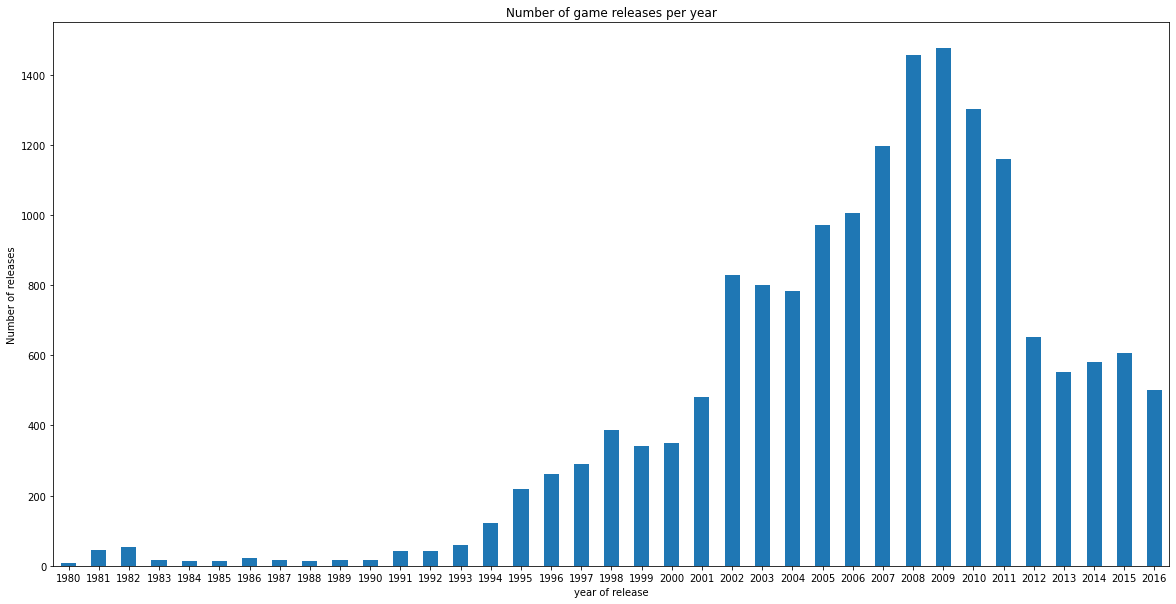

In [45]:
# The graph showing number of games release per year
year_count.plot.bar(rot=0, figsize=(20, 10))
plt.title('Number of game releases per year')
plt.xlabel('year of release')
plt.ylabel('Number of releases')
plt.show()

- From  1980 and 1995 period  200 video games were released per year. 
- From 1995  to 2001 having about 500 games released.
- 2002 saw a sharp increase; over 800 games were released that year.
- 2007 to 2011 are the top when it comes to releases
- 2009 boasting 1476 releases (the peak).
- Not all periods are significant.

#### Look at how sales varied from platform to platform.


In [46]:
# Calculate total sales per platform
sales_per_platform = df_games.pivot_table(index = ('platform'), values = 'total_sales', aggfunc = ('sum')).reset_index()
sales_per_platform

,platform,total_sales
0,2600,96.98
1,3do,0.10
2,3ds,259.00
3,dc,15.95
4,ds,806.12
5,gb,255.46
6,gba,317.85
7,gc,198.93
8,gen,28.35
9,gg,0.04


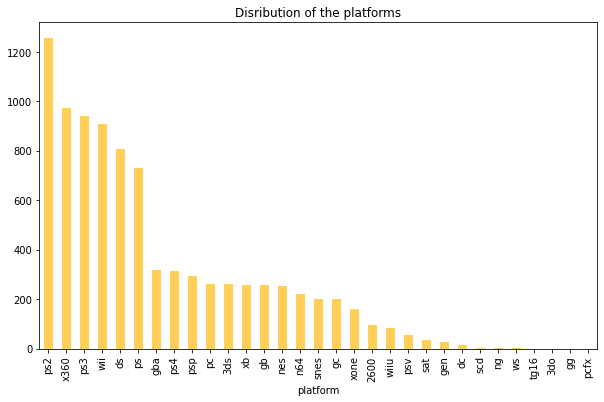

In [47]:
# This bar chart showing distribution of the total sales  by platforms
df_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).plot(kind= 'bar',figsize = (10,6),color=['#FFCF56' ],title = 'Disribution of the platforms')
plt.show()

In [48]:
# Find the greatest total sales Top-5 platforms
top_5_platform = sales_per_platform.sort_values(by='total_sales',ascending = False).head()
top_5_platform

,platform,total_sales
16,ps2,1255.77
28,x360,971.42
17,ps3,939.65
25,wii,907.51
4,ds,806.12


- As we see top 5 leading in sales platforms are  1-ps2, 2-x360, 3-ps3, 4-wii, 5- ds

In [49]:
# Summury of total sales per platform per year
filtered_df = df_games.query('platform in ["ps2","x360","ps3","wii","ds"]').pivot_table(index=['platform','year_of_release'],
                                                                          
                                                                          values = ['total_sales'],
                                                                         aggfunc = 'sum').reset_index()
filtered_df

,platform,year_of_release,total_sales
0,ds,1985,0.02
1,ds,2004,17.27
2,ds,2005,130.14
3,ds,2006,119.81
4,ds,2007,146.94
5,ds,2008,148.65
6,ds,2009,119.54
7,ds,2010,85.02
8,ds,2011,26.18
9,ds,2012,11.01


####  Studing Top 5 platforms  distribution based on data for each year. 

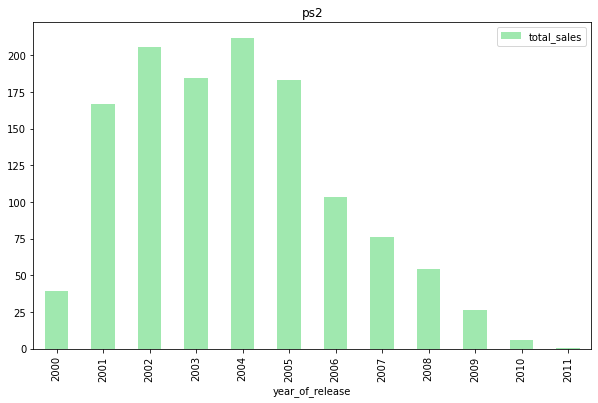

In [50]:

filtered_df.query('platform in[ "ps2"]').pivot_table(index = 'year_of_release',values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', title = 'ps2', figsize = (10,6), color=['#A0E8AF'] )
plt.show()

- As we see  sales data  are going up or down  over a specific timeframe
- From 2000 to 2004 going up and from 2004 to 2011 going to downn 
- They stay in the market abot 10 years

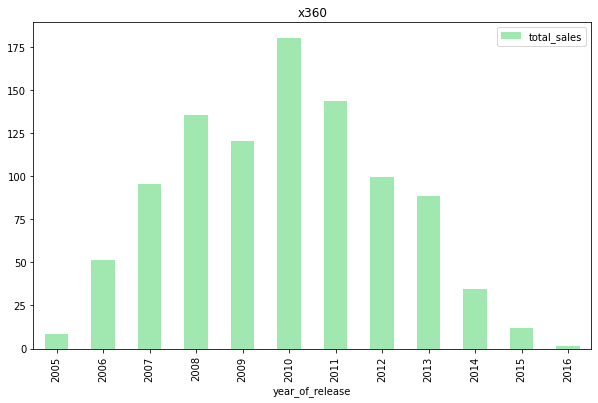

In [51]:
# Showing distribution 'x360' platform 
filtered_df.query('platform in[ "x360"]').pivot_table(index = 'year_of_release',values = 'total_sales', aggfunc = 'sum').plot( kind = 'bar', title = 'x360', figsize = (10,6), color=['#A0E8AF'])
plt.show()

                                                                                                                             
    

- 2005 released and sales going up to 2010 and going down to 2016
- time stay in market  5 years

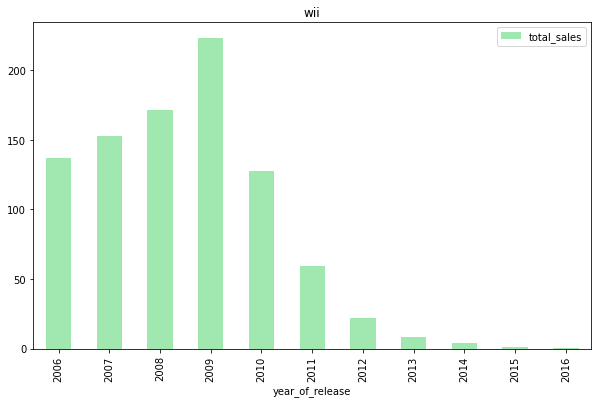

In [52]:
filtered_df.query('platform in[ "wii"]').pivot_table(index = 'year_of_release',values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',title = 'wii', figsize = (10,6),color=['#A0E8AF'])
plt.show()

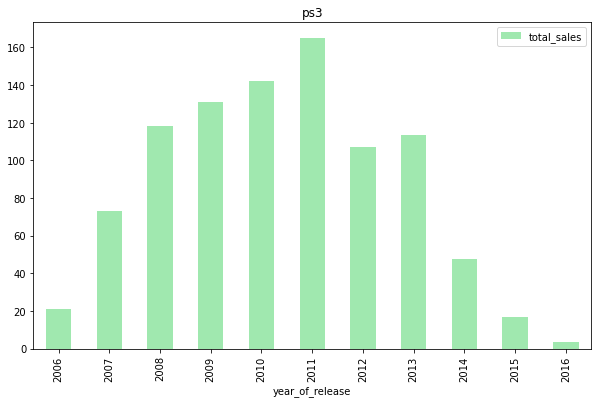

In [53]:
filtered_df.query('platform in[ "ps3"]').pivot_table(index = 'year_of_release',values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',title = 'ps3',figsize = (10,6),color=['#A0E8AF'] ) 
plt.show()

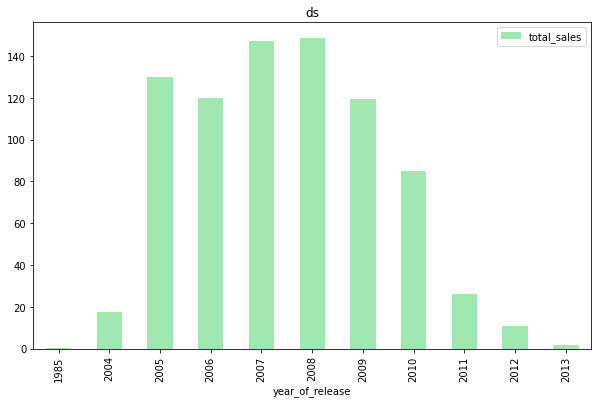

In [54]:
filtered_df.query('platform in[ "ds"]').pivot_table(index = 'year_of_release',values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',title = 'ds',figsize = (10,6),color=['#A0E8AF'])
plt.show()

In [55]:
# the most popural platform
df_games['platform'].mode()


0    ps2
dtype: object

#### Conclusion

- We obseved 5 top platforms
- The all 5 top platform (ps2, x360, ps3, wii, ds)	 have  intermedia trend .That means sales going up and going down
- 5 years generally take for new platforms to appear and old ones to fade
- The most popural platform is PS2

Which platforms are leading in sales?
Which ones are growing or shrinking?
Select several potentially profitable platforms.



In [56]:
df_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
Name: total_sales, dtype: float64

In [57]:
#Select several potentially profitable platforms.

platform_2016 = df_games.query('year_of_release == 2016').pivot_table(index=['platform','year_of_release','name'],
                                                                          values = ['total_sales'],
                                                                          aggfunc = 'sum').sort_values(by =[ 'total_sales','year_of_release'],ascending = False).reset_index()
platform_2016.head()

,platform,year_of_release,name,total_sales
0,ps4,2016,fifa 17,7.60
1,3ds,2016,pokemon sun/moon,7.14
2,ps4,2016,uncharted 4: a thief's end,5.39
3,ps4,2016,call of duty: infinite warfare,4.47
4,ps4,2016,battlefield 1,4.07


- The most profitable platforms in 2016 are 'ps4', '3ds', 'xone'
- If the platforms is continuing to trend the could potentially profitable platforms.

### Prognosis data for 2017

- To build prognosis for 2017 we will take data for period  2013 to 2016

#### How the best sellers behaved for period 2014 - 2016

In [58]:
platform_2014 = df_games.query('year_of_release >2013').pivot_table(index=['platform','year_of_release'],
                                                                          values = ['total_sales'],
                                                                          aggfunc = 'sum').sort_values(by =[ 'total_sales','year_of_release'],ascending = False).reset_index()
platform_2014.head(5)

,platform,year_of_release,total_sales
0,ps4,2015,118.90
1,ps4,2014,100.00
2,ps4,2016,69.25
3,xone,2015,60.14
4,xone,2014,54.07


**PS4**

In [59]:
# Summury of total sales from 2013-2016
ps4_2013 = df_games.query('platform == "ps4"and year_of_release >=2013').pivot_table(index =['platform' ,'year_of_release'],values = 'total_sales', aggfunc = 'sum').reset_index()
 
ps4_2013

,platform,year_of_release,total_sales
0,ps4,2013,25.99
1,ps4,2014,100.00
2,ps4,2015,118.90
3,ps4,2016,69.25


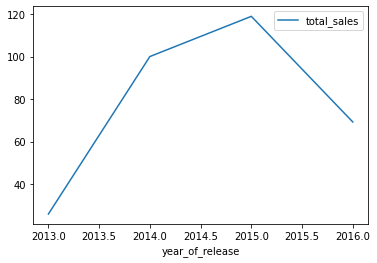

In [60]:
# Lets have look in line graph showing trend
ps4_2013.plot(x = 'year_of_release', y = 'total_sales')
plt.show()

**XONE**

In [61]:
# Summury of total sales from 2013-2016
xone_2013 = df_games.query('platform == "xone"and year_of_release >= 2013').pivot_table(index =['platform' ,'year_of_release'],values = 'total_sales', aggfunc = 'sum').reset_index()
 
xone_2013

,platform,year_of_release,total_sales
0,xone,2013,18.96
1,xone,2014,54.07
2,xone,2015,60.14
3,xone,2016,26.15


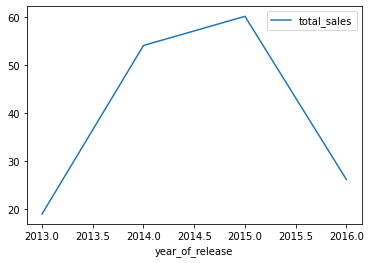

In [62]:
# Trend
# Lets have look in line graph showing trend
xone_2013.plot(x = 'year_of_release', y = 'total_sales')
plt.show()

**3DS**

In [63]:
# Summury of total sales from 2013 -2016
df_games.query('platform == "3ds" ').pivot_table(index = ['platform','year_of_release'],values = 'total_sales',aggfunc='sum')

total_sales
platform year_of_release             
3ds      2011                   63.20
         2012                   51.36
         2013                   57.76
         2014                   43.76
         2015                   27.78
         2016                   15.14

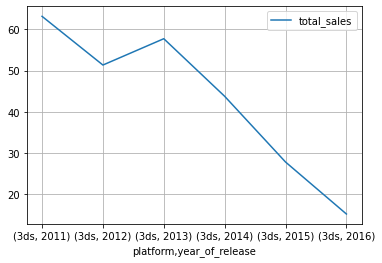

In [64]:
df_games.query('platform == "3ds" ').pivot_table(index = ['platform','year_of_release'],values = 'total_sales',aggfunc='sum').plot(grid = True)
plt.show()

- As we see the trend of  platforms is going down

Build a box plot for the global sales of all games, broken down by platform.
Are the differences in sales significant?
What about average sales on various platforms? Describe your findings.

In [65]:
# What about average sales on various platforms? (rename column)
top_platform_avg =df_games.query('year_of_release >= 2014').pivot_table(index=['platform','year_of_release'],
                                                                          values = ['total_sales'],
                                                                          aggfunc = 'mean').sort_values(by =[ 'total_sales','year_of_release'],ascending = False).reset_index()
platform_2014.head(5)

,platform,year_of_release,total_sales
0,ps4,2015,118.90
1,ps4,2014,100.00
2,ps4,2016,69.25
3,xone,2015,60.14
4,xone,2014,54.07


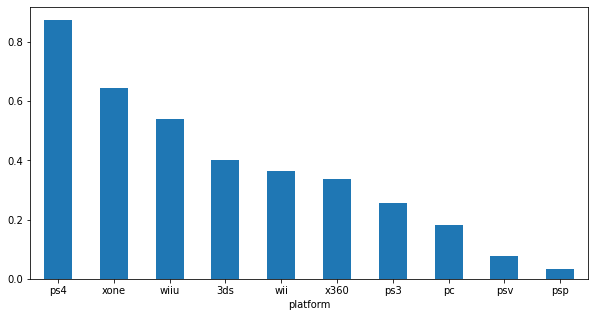

In [66]:
top_platform_avg.groupby(['platform'])['total_sales'].mean().sort_values(ascending = False).plot(kind = 'bar',rot=0, figsize=(10, 5) )
plt.show()

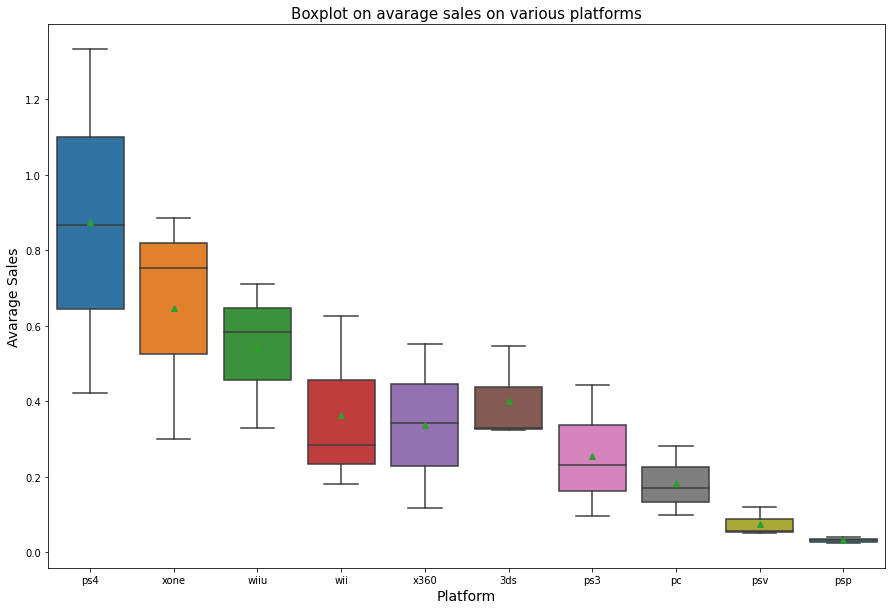

In [67]:
# Boxplot showing avarage sales per platforms
#sns.set_style("whitegrid")

# figure size
plt.figure(figsize=(15, 10))  
sns.boxplot(x = 'platform', y = 'total_sales', data = top_platform_avg, showmeans = True)
plt.ylabel("Avarage Sales", size=14)
plt.xlabel("Platform", size=14)
plt.title("Boxplot on avarage sales on various platforms", size=15)
plt.savefig("show_means_in_boxplot_Seaborn_boxplot_Python.png")


- Here we see a comparison of the data between the ps4, xone, and 3ds for the year 2016.
- The xone doesn't seem like a bad choice as a platform to release a game on either!

#### Take a look at how user and professional reviews affect sales for one popular platform . Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [68]:
df_critic = (df_games.query('platform in[ "ps4"] and year_of_release  > = 2013').pivot_table(index = ['platform','critic_score'],
                                                  values = 'total_sales',
                                                  aggfunc = 'sum').reset_index())
display(df_critic.sort_values(by = 'total_sales', ascending = False))


,platform,critic_score,total_sales
2,ps4,2015.0,118.90
1,ps4,2014.0,100.00
3,ps4,2016.0,69.25
0,ps4,2013.0,25.99


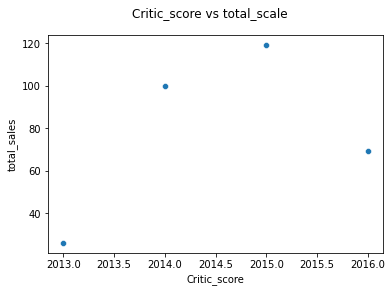

Corralation critic_score & total_sales : 0.4731449584618677


In [69]:
# Plot showing is any corallation between critic_score and sales

fig, ax = plt.subplots(figsize=(6, 4))
colors = {'short': 'MediumVioletRed', 'long': 'Navy'}
sns.scatterplot(data=df_critic, x='critic_score', y='total_sales', palette=colors, ax=ax)

ax.set(xlabel='Critic_score', ylabel='total_sales')
fig.suptitle('Critic_score vs total_scale')
plt.show()

print("Corralation critic_score & total_sales :", df_critic['critic_score'].corr(df_critic['total_sales']))

In [70]:
df_user = (df_games.query('platform in[ "ps4"] and year_of_release >= 2013').pivot_table(index = ['critic_score','user_score'],
                                                  values = 'total_sales',
                                                  aggfunc = 'sum').reset_index())
display(df_user.sort_values(by = 'total_sales',ascending = False))   


,critic_score,user_score,total_sales
2,2015.0,2015.0,118.90
1,2014.0,2014.0,100.00
3,2016.0,2016.0,69.25
0,2013.0,2013.0,25.99


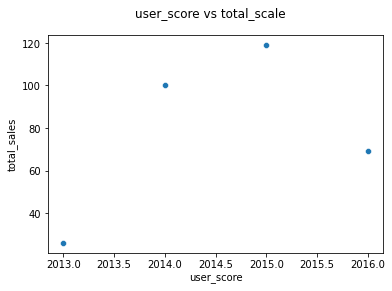

Corralation of user_score & total_sales : 0.4731449584618677


In [71]:

fig, ax = plt.subplots(figsize=(6, 4))
colors = {'short': 'MediumVioletRed', 'long': 'Navy'}
sns.scatterplot(data=df_user, x='user_score', y='total_sales', palette=colors, ax=ax)

ax.set(xlabel='user_score', ylabel='total_sales')
fig.suptitle('user_score vs total_scale')
plt.show()

print("Corralation of user_score & total_sales :", df_user['user_score'].corr(df_user['total_sales']))

- There is “moderate” correlation between critic score and sales
- There is negetive corralation   between user score and sales

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

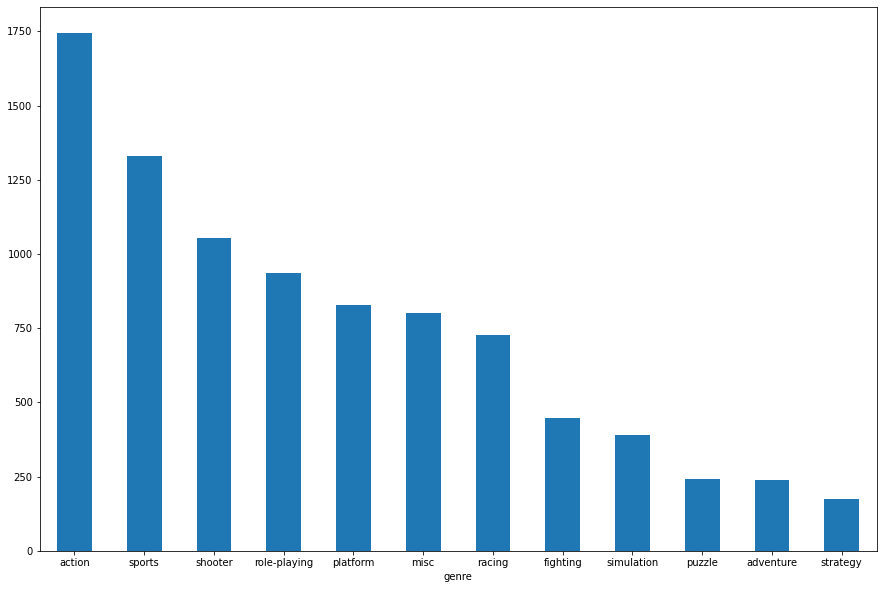

In [72]:
# Visiual distribution by 'genre'
df_games.groupby(['genre'])['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar',rot=0, figsize=(15, 10))
plt.show()

- The most popular genre are action, sport and shooter

In [73]:
df_games['genre'].mode()

0    action
dtype: object

In [74]:
# Summury by genre
df_games.groupby('genre')['total_sales'].sum().sort_values(ascending = False)

genre
action          1744.17
sports          1331.27
shooter         1052.45
role-playing     934.56
platform         827.77
misc             802.51
racing           728.67
fighting         447.53
simulation       389.97
puzzle           242.57
adventure        237.59
strategy         174.23
Name: total_sales, dtype: float64

In [75]:
df_games.groupby(['genre'])['total_sales'].agg(['mean','median', 'var']).reset_index().sort_values(by = 'mean')

,genre,mean,median,var
1,adventure,0.182341,0.05,0.258606
11,strategy,0.255095,0.10,0.269358
5,puzzle,0.418224,0.11,2.441231
9,simulation,0.446701,0.15,1.408543
3,misc,0.458577,0.16,1.702072
0,action,0.517711,0.19,1.312392
2,fighting,0.527126,0.21,0.906882
10,sports,0.566980,0.22,4.346300
6,racing,0.583403,0.19,2.744330
7,role-playing,0.623872,0.18,2.924708


In [76]:
genre_years =df_games.query('year_of_release >= 2014')

In [77]:
genre_years.groupby('genre')['total_sales'].agg(['mean', 'median',]).sort_values(by = 'median', ascending = False)

,mean,median
genre,,
shooter,1.335469,0.515
sports,0.680000,0.180
platform,0.476053,0.140
fighting,0.470333,0.125
role-playing,0.458108,0.110
simulation,0.298409,0.100
action,0.322068,0.090
misc,0.332301,0.090
racing,0.398841,0.090


In [78]:
# Generalize about genres with high and low sales
genre_years.groupby('genre')['total_sales'].max().sort_values(ascending= False)

genre
shooter         14.63
action          12.62
role-playing    11.68
sports           8.58
fighting         7.55
racing           7.09
misc             5.27
platform         3.21
simulation       3.05
adventure        1.66
puzzle           1.19
strategy         0.52
Name: total_sales, dtype: float64

- The profitable genre : shooter

### Create a user profile for each region

- For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

In [79]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,2006.0,2006.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,1985.0,1985.0,undefined,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,2008.0,2008.0,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,2009.0,2009.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,1996.0,1996.0,undefined,31.38


In [80]:
region_df = df_games.query('year_of_release  > 2013')
region_df = region_df[['platform','genre','na_sales','eu_sales','jp_sales','total_sales']].reset_index()
region_df.head()


,index,platform,genre,na_sales,eu_sales,jp_sales,total_sales
0,31,ps4,shooter,6.03,5.86,0.36,14.63
1,42,ps4,action,3.96,6.31,0.38,12.62
2,47,3ds,role-playing,4.35,3.49,3.10,11.68
3,77,ps4,sports,1.12,6.12,0.06,8.58
4,87,ps4,shooter,2.99,3.49,0.22,7.98


### NA( north america) region 

In [81]:
# by 'platform'
region_na = region_df.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()
region_na


platform
ps4     98.61
xone    81.27
x360    28.30
3ds     22.64
ps3     22.05
Name: na_sales, dtype: float64

In [82]:
# by 'genre'
region_df.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()


genre
shooter         79.02
action          72.53
sports          46.13
role-playing    33.58
misc            15.05
Name: na_sales, dtype: float64

platform
ps4     98.61
xone    81.27
x360    28.30
3ds     22.64
ps3     22.05
Name: na_sales, dtype: float64


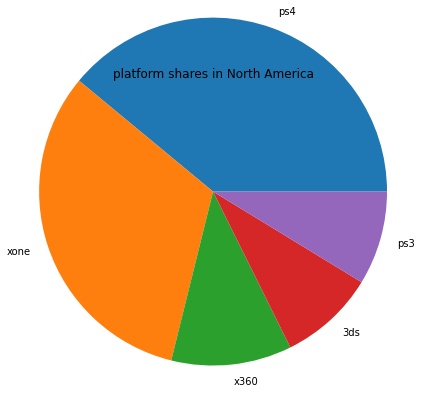


genre
shooter         79.02
action          72.53
sports          46.13
role-playing    33.58
misc            15.05
Name: na_sales, dtype: float64


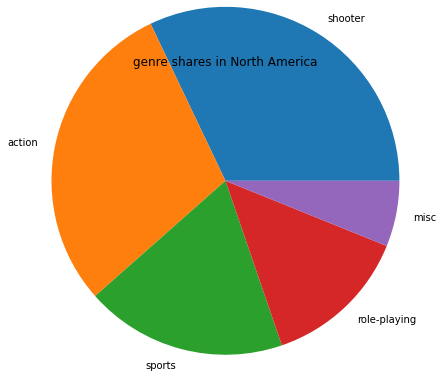

In [83]:
# Visualization by pie chart
#creates an array called cols with entries 'platform', 'genre', and 'rating'
cols=['platform', 'genre']

for col in cols:#loops through the cols array
    na_slice= region_df.groupby(col)['na_sales'].sum().sort_values(ascending=False).head(5)
    #groups relev_data by the present column and gets the sum of the north american sales for each of its 
    #values sorting them in descending order
    print(na_slice.head())#prints the first 5 rows of the grouping
    plt.pie(na_slice, labels=na_slice.index, radius=2)#creates a pie chart for our grouping
    plt.title('{} shares in North America'.format(col))
    #titles the pie chart in the format '<col> shares in North America'
    plt.show()#shows the chart above
    print('')#prints an empty line

### EU(europe) region

In [84]:
region_df.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()

platform
ps4     130.04
xone     46.25
ps3      25.54
pc       17.97
3ds      16.12
Name: eu_sales, dtype: float64

In [85]:
region_df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()

genre
action          74.68
shooter         65.52
sports          45.73
role-playing    28.22
racing          14.13
Name: eu_sales, dtype: float64

platform
ps4     130.04
xone     46.25
ps3      25.54
pc       17.97
3ds      16.12
Name: eu_sales, dtype: float64


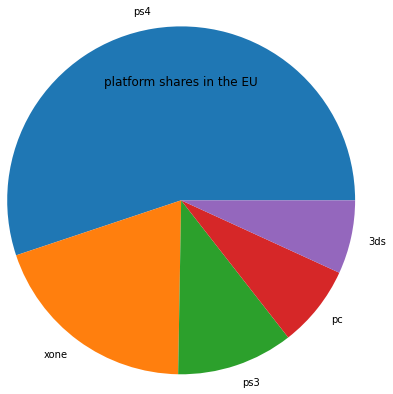


genre
action          74.68
shooter         65.52
sports          45.73
role-playing    28.22
racing          14.13
Name: eu_sales, dtype: float64


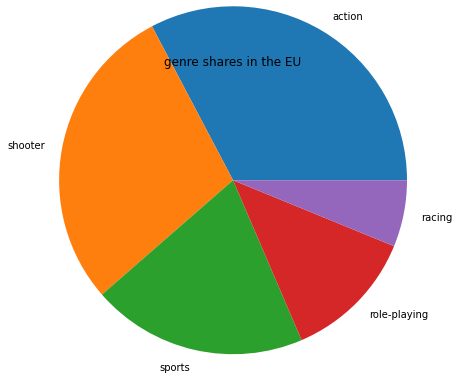

In [86]:
# Visualization by pie chart
cols=['platform', 'genre']

for col in cols:#loops through the cols array
    eu_slice=region_df.groupby(col)['eu_sales'].sum().sort_values(ascending=False).head(5)
    #groups relev_data by the present column and gets the sum of the eu_sales for each of its 
    #values sorting them in descending order
    print(eu_slice.head())#prints the first 5 rows of the grouping
    plt.pie(eu_slice, labels=eu_slice.index, radius=2)#creates a pie chart for our grouping
    plt.title('{} shares in the EU'.format(col))
    #titles the pie chart in the format '<col> shares in the EU'
    plt.show()#shows the chart above
    print('')#prints an empty line

### JP(japan) region

In [87]:
region_df.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()

platform
3ds     44.24
ps4     15.02
psv     14.61
ps3     11.22
wiiu     7.31
Name: jp_sales, dtype: float64

In [88]:
region_df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()

genre
role-playing    31.23
action          29.58
fighting         6.37
misc             5.61
shooter          4.87
Name: jp_sales, dtype: float64

platform
3ds     44.24
ps4     15.02
psv     14.61
ps3     11.22
wiiu     7.31
Name: jp_sales, dtype: float64


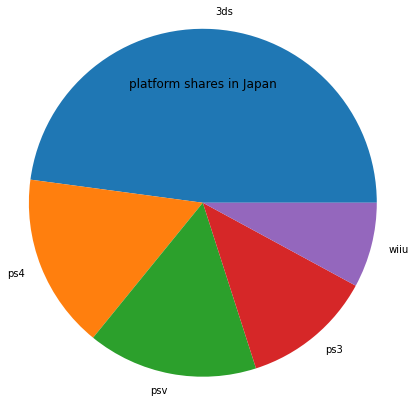


genre
role-playing    31.23
action          29.58
fighting         6.37
misc             5.61
shooter          4.87
Name: jp_sales, dtype: float64


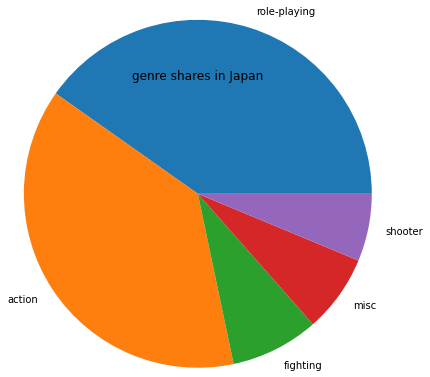

In [89]:
# Visualization by pie chart

#creates an array called cols with entries 'platform', 'genre', and 'rating'
cols=['platform', 'genre']

#loops through the cols array
#groups relev_data by the present column and gets the sum of the jp_sales for each of its 
    #values sorting them in descending order
for col in cols: 
    jp_slice=region_df.groupby(col)['jp_sales'].sum().sort_values(ascending=False).head(5)
#prints the first 5 rows of the grouping    
    print(jp_slice.head()) #prints the first 5 rows of the grouping
#creates a pie chart for our grouping
    plt.pie(jp_slice, labels=jp_slice.index, radius=2)
    plt.title('{} shares in Japan'.format(col))
    #titles the pie chart in the format '<col> shares in Japan'
    plt.show()#shows the chart above
    print('')#prints an empty line

#### Summary by Platform

In [90]:
# sum total sales for each platform, in descending order
top_platforms = region_df.groupby('platform').agg({'total_sales':'sum'}).sort_values('total_sales',ascending=False).reset_index()

#retrieve top 5 platforms
top_5_list = top_platforms['platform'][0:5].to_list()

#filter all games on the top 5 platforms
top_5_platforms = df_games.query('platform in @top_5_list')

top_5_platforms_grouped = top_5_platforms.groupby('platform').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','total_sales':'sum'}).reset_index()

top_5_platforms_grouped

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3ds,83.49,61.48,100.67,259.00
1,ps3,393.49,330.29,80.19,939.65
2,ps4,108.74,141.09,15.96,314.14
3,x360,602.47,270.76,12.43,971.42
4,xone,93.12,51.59,0.34,159.32


- JP has the highest sales on 3DS games
- EU has the highest sales on PC3 games and PS4 games
- NA has the highest sales on X360 games and XONE games

#### Summary by Genre

In [91]:
# sum total sales for each genre, in descending order
top_genres = region_df.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales',ascending=False).reset_index()

#retrieve top 5 genres
top_5_genres_list = top_genres['genre'][0:5].to_list()

#filter all games on the top 5 genres
top_5_genres = df_games.query('genre in @top_5_genres_list')

top_5_genres_grouped = top_5_genres.groupby('genre').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','total_sales':'sum'}).reset_index()

top_5_genres_grouped

,genre,na_sales,eu_sales,jp_sales,total_sales
0,action,879.01,519.13,161.43,1744.17
1,misc,407.27,212.74,108.11,802.51
2,role-playing,330.81,188.71,355.41,934.56
3,shooter,592.24,317.34,38.76,1052.45
4,sports,684.43,376.79,135.54,1331.27


#### Conclusion:

- We looked each region (NA, EU, JP):
- The top five platforms in NA region are ps4,xone, x360 ,3ds, ps3  and the top five genres are shooter,action,sports,role_playing,misc
- In UE region the top 5 platforms: ps4, one, ps3, ps, 3ds and genre: action,shooting,sport,role-playing, racing.
- In JP region the top 5 platform :3ds,ps4,psv,ps3,wiiu and genre: role-playing, action, fighting,misc,shooter

## Test statistical hypotheses:

Average user ratings of the Xbox One and PC platforms are the same.

Average user ratings for the Action and Sports genres are different

In [92]:
# Retrive all 'pc' platforms from column 'platform' using slicing
data = df_games.query('platform in[ "pc","xone","ps2","ps3","ps4"] and year_of_release >= 2013', inplace = False)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,2013.0,2013.0,M,21.05
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,2015.0,2015.0,undefined,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,2014.0,2014.0,M,12.62
69,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,2013.0,2013.0,M,9.36
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,2015.0,2015.0,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,2016.0,2016.0,M,0.01
16674,tsukigime ranko's longest day,ps3,2014,action,0.00,0.01,0.00,0.00,2014.0,2014.0,undefined,0.01
16691,dynasty warriors: eiketsuden,ps3,2016,action,0.00,0.00,0.01,0.00,2016.0,2016.0,undefined,0.01
16692,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,2014.0,2014.0,M,0.01


In [93]:
#here we have to filter the 'years of release' > = 2013
data1 = df_games[ df_games['year_of_release'] >=2013].reset_index()
data1.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,2013.0,2013.0,M,21.05
1,23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,2013.0,2013.0,M,16.27
2,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,2015.0,2015.0,undefined,14.63
3,33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,2013.0,2013.0,undefined,14.60
4,42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,2014.0,2014.0,M,12.62


###   The  Xbox One and PC platforms

- null hypothesis H₀: the average user ratings of the Xbox One and PC platforms are the are equal(same), there’s no difference.

- hypothesis H₁ : Average user ratings of the Xbox One and PC platforms  are not equal(not same), there is difference.

- alpha value - 5%

In [94]:
# Test hypothesis
from scipy import stats as st
import numpy as np

pc_data = data.query('platform == "ps4"')
xone_data = data.query('platform == "xone"')

#set alpha
alpha = 0.05

#calculate result
results = st.ttest_ind(pc_data['user_score'], xone_data['user_score'],equal_var=False)
print('p-value:', results.pvalue)

#check our hypothesis
if(results.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')


p-value: 0.009817992609413746
We reject the null hypothesis


### The Action and Sports genres

- null hypothesis H₀: the average user ratings of the Action and Sports genres are the are equal, there’s no difference.

- hypothesis H₁ : Average user ratings of the Action and Sports genres are not equal, there is difference.

- alpha value - 5%

In [95]:
# Test hypothesis
from scipy import stats as st
import numpy as np

action = data1.query('genre == "action"')
sports = data1.query('genre == "sports"')

#set alpha
alpha = 0.05

#calculate result
#results = st.ttest_ind(action, sports)
results =  st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-value:', results.pvalue)

#check our hypothesis
if(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

p-value: 0.11813101981472263
We can't reject the null hypothesis


## General conclusion¶

1.In the data's preparation & exploration stage:

- We observed missing values of columns in Dataframe 
- The most missing values in column 'ctitic_score' and have 51% of misslingness.
- Type of missing data is MAP

2.In the data transformation and data-cleaning process stage:

- Data in columns 'critic_score' and 'user_score' are quantitative variables. Missing values for such variables are filled in with representative values (median)
- Data in colums 'name', 'genre' are qualitative removed by method dropna() and column 'rating' replaced with str'undentify'
- All dataset have different type of register so transformed to lowercase register
- Missing values in colum 'year_of_release'was imputed with median and   converted to int type
- The new column 'total_sale' was created using culculation of sales all regions


3.In analysis stage to answer our questions we got next conclusion:
- We looked at how many games were released in different years. There is no significant for every period.
- The sales varied from platform to platform. The greatest total sales showed 1-ps2, 2-x360, 3-ps3, 4-wii, 5- ds based on data distribution bar chart for each year.
- The  all top 5 paltform showed intermedia trend. The sales goes up and then goes down
- it generally take 5 years for new platforms to appear and old ones to fade
- We observe data for period 2016 and selected potentially profitable platforms 'PS4' and 'XONE'
- There is “moderate” correlation between critic score and sales and  negetive corralation between user score and sales
- The most profitable genres 1)shooter, 2)role_playing and 3)action
- by Testing the hypothesis that the average user ratings of the Xbox One and PC platforms are differ and no equal(not same)
- by testing the hypothesis that average user ratings for the Action and Sports genres are not diier and equal(same)